# Introduction to Fourier Theory and iPython Notebooks

Renee Hlozek and Jeff McMahon

We will take a look at what Fourier transforms do in 1D and 2D.  In its simplest form, a 1D Fourier transform takes a time-varying function, measures possible cycles it contains, and returns the amplitude, offset and rotation for all cycles that were found.

An iPython Notebook consists of a standard and efficient Python back end with a web-based interface.  The interface includs both text boxes and code boxes.  The text boxes support latex math and the output of the code (both text and plots) are all stored in the document.  All cells in a given notebook share the same namespace.  This arrangement allows for increadibly well documnted code that is easy to read and support.

To get started with this intro, we must first import a number of python libraries.

In [1]:
import matplotlib   # plotting libraries  
import matplotlib.pyplot as plt   # plotting libraries  
import cmath as cm  # complex math
import pylab as pl  # plotting and numerical routines
import numpy as np  # numerical routines 
import matplotlib.cm as cmap  ## color map for 2d plotting

pi2 = cm.pi * 2.0   # a useful constatn: 2 * pi
# the next line is an "magic word" that puts the plots into the notebook rather than external
%matplotlib inline  

We start by writing our own <a href="https://en.wikipedia.org/wiki/Discrete_Fourier_transform">discrete Fourier transform</a>

$$X_k = \sum_{n=0}^{N-1} x_n e^{-2\pi i k n / N}$$


With every Fourier trasform routine, make sure to check the normalisation and sign conventions.

In [2]:
def fourier(x):
    N = len(x)
    fourier = np.zeros(N,dtype=complex)
    for k in range(N):
        fouriern=0
        for n in range(N):
            fouriern += x[n]*cm.exp(-1j*pi2*k*n/N)
        fourier[k]=fouriern
    return fourier

The inverse Fourier trasnform is defined as:

$$X_n = \frac 1 N \sum_{n=0}^{N-1} x_k e^{2\pi i k n / N}$$


In [3]:
def inv_fourier(X):
    N = len(X)
    inv_fourier = np.zeros(N, dtype=complex)
    for n in range(N):
        inv_fourierk=0
        for k in range(N):
            inv_fourierk += X[k]*cm.exp(1j*pi2*n*k/N)
        inv_fourier[n] = inv_fourierk/N
    return inv_fourier

 We want to test our code by inserting a sine wave signal and then checking that:

    (1) our Fourier transform matches the fft transform from within numpy
    (2) that if we inverse transform the Fourier transform we get the original wave back!

First we create an input sine wave signal:

Input Sine Wave Paramaters:
frequency = 50.0
amplitude = 50
phase ang = 12


C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


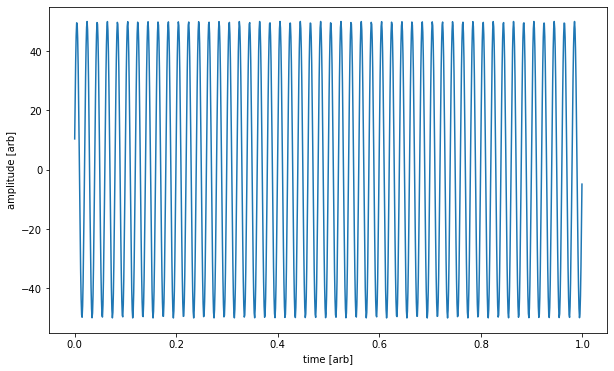

In [4]:
N = 1024 # degrees (Number of samples)
a = 50 #float(np.random.randint(1, 100))  ## random integer (amplitude) between 0 and 100
f = 50. #float(np.random.randint(1, 50))  ## random integer (frequency) between 0 and 50
p = 12 #float(np.random.randint(0, 360))  ## random integer (phase) between 0 and 360

## print out the sine wave paramaters 
print("Input Sine Wave Paramaters:")
print("frequency = " + str(f))   ## not that strings can be added in python, very convenient
print("amplitude = " + str(a))
print("phase ang = " + str(p))

## make a pure sine wave array
t = np.arange(0,N, dtype=complex)/N   ## a time variable from 0 to 1
fn = a * np.sin(pi2* f * t + p / 360. * pi2)   ## the pure sine wave 
pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.plot(t,fn.real)
pl.xlabel("time [arb]")
pl.ylabel("amplitude [arb]")
pl.show()

Next we calculate the Fourier trasnfomrm using our fourier transform funciton and examine the results.  

NOTE:  Given the normalization convention we have adopted we use the inverse FFT to go from time to frequency to ensure that we get a meanigful amplitude out of our results.   

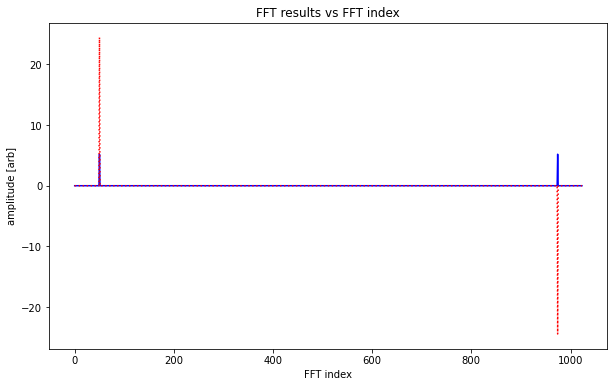

In [5]:
fouriertrans = inv_fourier(fn)  ## inverse FFT using our code

pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.xlabel("FFT index")
pl.ylabel("amplitude [arb]")
pl.title("FFT results vs FFT index")
pl.plot((fouriertrans.real),'b',)
pl.plot((fouriertrans.imag),'r:')

Notes: 

    (1) The output of the FFT includes both positive and negative freuqnecy components (right and left going waves) as the algorythem can not distinguish these two cases.  
    
    (2) The amplitude of the waves is given by the quadrature sum of the real and imaginary parts (e.g., the magnitude of the complex FFT).

    (3) Zero frequency occurs left of the array, not in the center.   Thus you have to be very careful interpreting the frequency content.   For reference, the arrangement is right going waves on the left counting up to the max frequnecy in the array, then left going waves counting down to the first non-zero frequency on the right.
    

Next we create an a frequency array in the same indexing scheme of the FFT.  We do this by identifiying the highest frequnecy that can be encoded within our array (See the Nyqyist-Shannon sampling theorem).  This is called the Nyquist frequency and is calculated as $f_{Nyquist} = 1/T_{sample}/2$, where $T_{sample}$ is the time between samples.

Nyquist frequency:  512.0


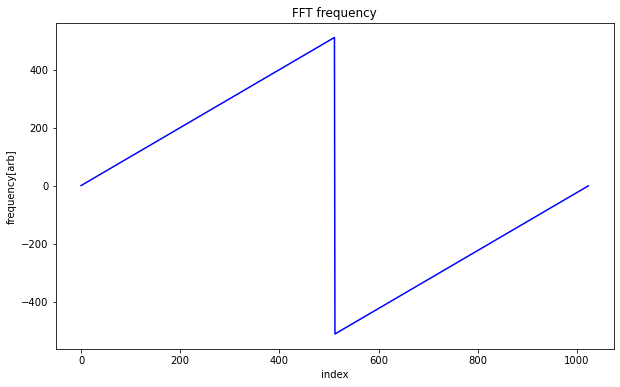

In [6]:
## make an array to represent the frequency
delta_t = (t[1]-t[0]).real  ## the step size for the t grid
freq_nyquist = 1/delta_t/2.
print("Nyquist frequency: ", freq_nyquist)


freq = np.roll(np.linspace(-1,1,N)*freq_nyquist,int(N/2))

## plot the freuency array
pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.xlabel("index")
pl.ylabel("frequency[arb]")
pl.title("FFT frequency")
pl.plot(freq,'b', label='freq')
pl.plot()
pl.show()

As expected the zero frequency is on the left and the maximum frequency is in the middle.  The sign of the frequency encodes right vs left going waves.

Now that we have the frequency array we can plot the FFT vs frequency and easily interpret the results.

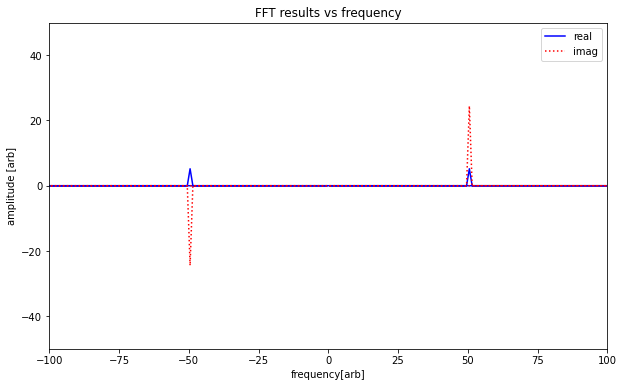

In [7]:
## make a plot of the real and imaginary parts of the FFT
pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.title("FFT results vs frequency")
pl.plot(freq,(fouriertrans.real),'b',label='real')
pl.plot(freq,(fouriertrans.imag),'r:', label='imag')
leg = plt.legend(loc='best')
pl.axis([-100,100,-50,50])
pl.show()

<font color='red'>EXCERCISE: </font> Connvince yourself that the inverse FFT is giving the correct amplitude and frequency results.

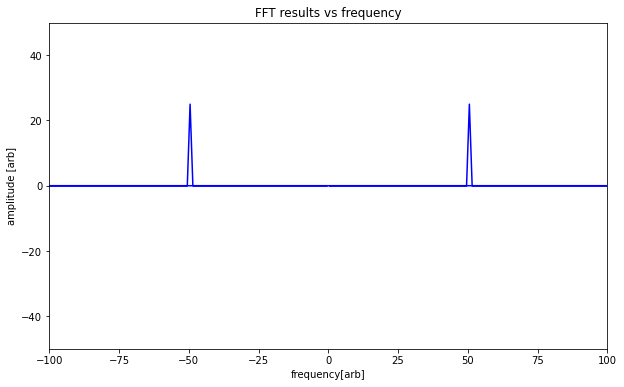

Value of peak amplitude: 25.00000000000003 <- this should be 25


In [8]:
## Spikes at +/- 50 freq with magnitudes that sum to 50

pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.title("FFT results vs frequency")
pl.plot(freq,(np.abs(fouriertrans)),'b',label='real')
pl.axis([-100,100,-50,50])
pl.show()

print("Value of peak amplitude:", np.abs(np.max(fouriertrans)), "<- this should be 25")

Next we verify that the FFT and iFFT are in fact inverse functions:

C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

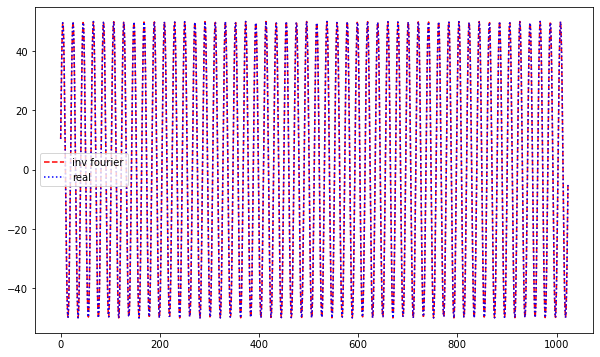

maximum difference between the results: 2.775701595052713e-11 <- this should be zero within rounding error.


In [9]:
invfouriertrans = fourier(fouriertrans)
pl.clf()
pl.figure(figsize=(10, 6))
pl.plot(invfouriertrans, 'r--', label='inv fourier')
pl.plot(fn.real, 'b:', label='real')
plt.legend(loc='best')
pl.show()
print("maximum difference between the results:", np.max(np.abs(invfouriertrans - fn)),"<- this should be zero within rounding error.")

In the final 1-d excercise we check that the Numpy implemntation of the FFT is identical to our implemntation

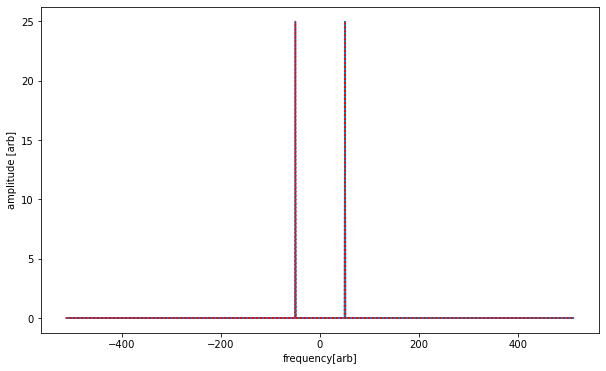

maximum difference between the results: 6.637568348178552e-12 <- this should be zero within rounding error.


In [10]:
ftpl = np.fft.ifft(fn)       ## FFT using numpy code

## make a plot comparing these functions
pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.plot(freq,np.abs(ftpl))
pl.plot(freq,np.abs(fouriertrans),'r:')
pl.show()
## calculate the maximum difference
print("maximum difference between the results:", np.max(np.abs(fouriertrans - ftpl)),"<- this should be zero within rounding error.")

Unsurprisingly the two algorythems agree within numerical rounding errors.

<font color='red'>EXCERCISE: </font> Write code to generate a few functions where we know the Fourier transform well, eg. a Gaussian, a delta function etc. Use the code above and plot the FTs of these functions. Use the numpy code to check!

C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


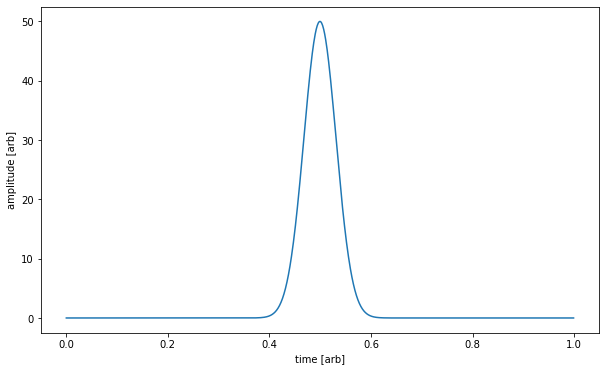

Nyquist frequency:  512.0


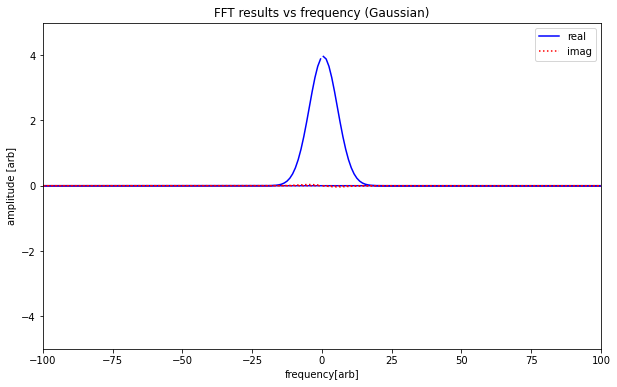

C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

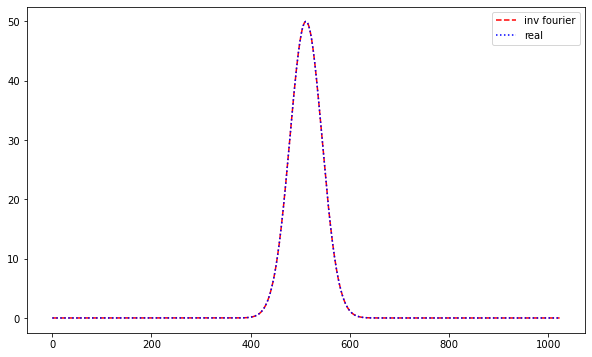

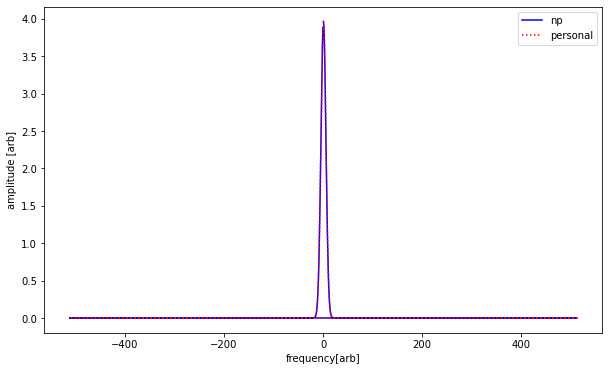

maximum difference between the results: 1.4449591963335786e-12 <- this should be zero within rounding error.


In [17]:
# Your code here
N = 1024 # resolution
t = np.arange(0,N, dtype=complex)/N # Time array

# Gaussian
g = 50*np.exp(-5 * ((t-np.mean(t))/.1)**2.)

pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.plot(t, np.abs(g))
pl.xlabel("time [arb]")
pl.ylabel("amplitude [arb]")
pl.show()

## make an array to represent the frequency

delta_t = (t[1]-t[0]).real  ## the step size for the t grid
freq_nyquist = 1/delta_t/2.
print("Nyquist frequency: ", freq_nyquist)
freq = np.roll(np.linspace(-1,1,N)*freq_nyquist,int(N/2))

fouriertrans = inv_fourier(np.fft.fftshift(g))  ## inverse FFT using our code
ftpl = np.fft.ifft(np.fft.fftshift(g))       ## FFT using numpy code

## make a plot of the real and imaginary parts of the FFT
fig = pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.title("FFT results vs frequency (Gaussian)")
pl.plot(freq,(fouriertrans.real),'b',label='real')
pl.plot(freq,(fouriertrans.imag),'r:', label='imag')
leg = plt.legend(loc='best')
pl.axis([-100,100,-5,5])
pl.show()
fig.savefig("C:\\Users\\jeffr\\Documents\\Actual Docs\\CMB Research\\gauss_fft.png", dpi=150)

## plot inverse
invfouriertrans = np.fft.ifftshift(fourier(fouriertrans))
pl.clf()
pl.figure(figsize=(10, 6))
pl.plot(invfouriertrans, 'r--', label='inv fourier')
pl.plot(g.real, 'b:', label='real')
plt.legend(loc='best')
pl.show()

## make a plot comparing these functions
fig = pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.plot(freq,np.abs(ftpl), 'b', label='np')
pl.plot(freq,np.abs(fouriertrans),'r:', label='personal')
plt.legend()
pl.show()
fig.savefig("C:\\Users\\jeffr\\Documents\\Actual Docs\\CMB Research\\gauss_user_vs_np.png", dpi=150)

## calculate the maximum difference
print("maximum difference between the results:", np.max(np.abs(fouriertrans - ftpl)),"<- this should be zero within rounding error.")

C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


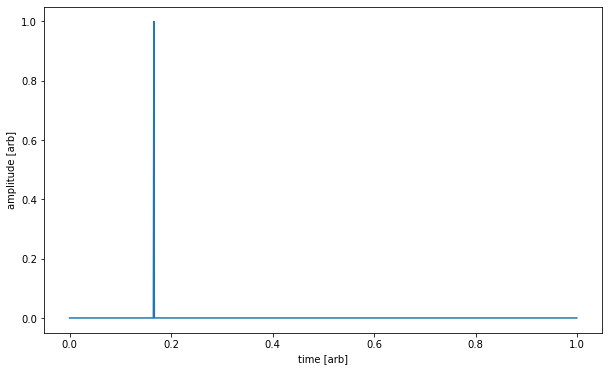

Nyquist frequency:  512.0


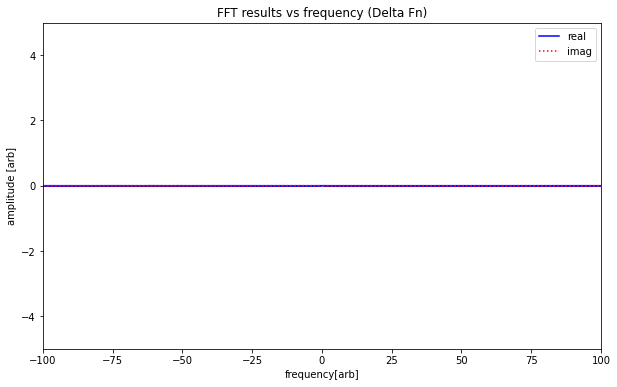

C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

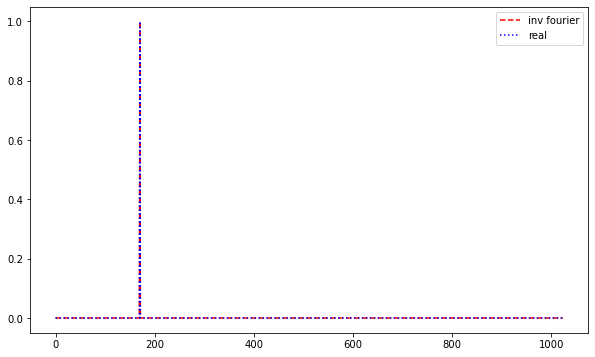

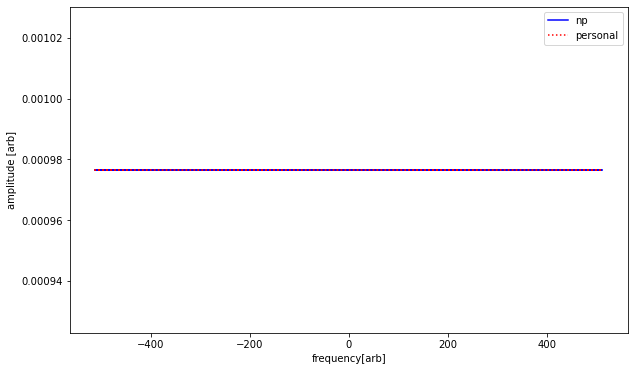

maximum difference between the results: 6.089231964919129e-16 <- this should be zero within rounding error.


In [18]:
# Your code here
N = 1024 # resolution
t = np.arange(0,N, dtype=complex)/N # Time array

# Delta fn
f = np.zeros(N)
f[int(N/6)] = 1.

pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.plot(t, np.abs(f))
pl.xlabel("time [arb]")
pl.ylabel("amplitude [arb]")
pl.show()

## make an array to represent the frequency
t = np.arange(0,N, dtype=complex)/N
delta_t = (t[1]-t[0]).real  ## the step size for the t grid
freq_nyquist = 1/delta_t/2.
print("Nyquist frequency: ", freq_nyquist)
freq = np.roll(np.linspace(-1,1,N)*freq_nyquist,int(N/2))

fouriertrans = inv_fourier(np.fft.fftshift(f))  ## inverse FFT using our code
ftpl = np.fft.ifft(np.fft.fftshift(f))       ## FFT using numpy code

## make a plot of the real and imaginary parts of the FFT
fig = pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.title("FFT results vs frequency (Delta Fn)")
pl.plot(freq,(fouriertrans.real),'b',label='real')
pl.plot(freq,(fouriertrans.imag),'r:', label='imag')
leg = plt.legend(loc='best')
pl.axis([-100,100,-5,5])
pl.show()
#fig.savefig("C:\\Users\\jeffr\\Documents\\Actual Docs\\CMB Research\\delta_fft.png", dpi=150)


## plot inverse
invfouriertrans = np.fft.ifftshift(fourier(fouriertrans))
pl.clf()
pl.figure(figsize=(10, 6))
pl.plot(invfouriertrans, 'r--', label='inv fourier')
pl.plot(f.real, 'b:', label='real')
plt.legend(loc='best')
pl.show()

## make a plot comparing these functions
fig = pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.plot(freq,np.abs(ftpl), 'b', label='np')
pl.plot(freq,np.abs(fouriertrans),'r:', label='personal')
plt.legend()
pl.show()
#fig.savefig("C:\\Users\\jeffr\\Documents\\Actual Docs\\CMB Research\\delta_user_vs_np.png", dpi=150)

## calculate the maximum difference
print("maximum difference between the results:", np.max(np.abs(fouriertrans - ftpl)),"<- this should be zero within rounding error.")

In [23]:
np.sum(np.abs(fouriertrans))

50.000000000014694

# Convolutions

The <a href="https://en.wikipedia.org/wiki/Convolution">convolution</a> of two discretely sampled (with $N$ samples) functions $f_i$ and $g_i$ is defined as $$(f * g)_k = \sum_{i=0}^{N-1} f_k g_{i-k}$$.

In other words, to calcuate the convolution: (1) muplitply two functions and sum them to get a number and (2) repeat the procedure for all possible offsets.

In the following example we compute the convolution of a gaussina with a two delta functions.

<ipython-input-28-8f8b52303a10>:24: ComplexWarning: Casting complex values to real discards the imaginary part
  conv[i] = np.sum(f *np.roll(g,i))
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\matplotlib\transforms.py:2817: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


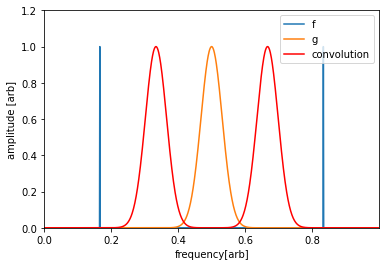

In [28]:
from scipy.stats import chi2
import numpy as np
f = np.zeros(N)
f[int(N/6)] = 1.
f[int(N*5/6)] = 1.


gauss=True

if chi2:
    
    g = chi2.pdf(np.real(t), 55)
    g = g/np.max(g)
if gauss:
    g = np.exp(-5 * ((t-np.mean(t))/.1)**2.)

def convolution(f,g):
    g=g[::-1]
    N = np.size(f)
    conv = np.zeros(N)
    
    i = 0
    while (i <N):
        conv[i] = np.sum(f *np.roll(g,i))
        i+=1
    return(conv)

conv = convolution(f,g)


pl.plot(t,f, label='f')
pl.plot(t,g, label='g')
pl.plot(t,conv,"r", label='convolution')
plt.legend(loc='best')
pl.axis([np.min(t),np.max(t),0,1.2])

pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
#pl.title("f (blue), g(green), and the convolution of these (red)")
pl.show()

If you selected "gaussian" to be true, note that since the green Gaussian curve is centered between the functions: the convolution peaks at points when the offsets center the gaussian on the blue delta functions.  For our applicaitons we often want to center the results such that the convolution peaks directly on the delta functions.  To do this we must center the convolving kernal (again Gaussian or $\chi^2$ depending on what you chose above) at zero frequency which following the convention in the FFT is the left edge of the array.  We do this in the following example.

<ipython-input-28-8f8b52303a10>:24: ComplexWarning: Casting complex values to real discards the imaginary part
  conv[i] = np.sum(f *np.roll(g,i))
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\matplotlib\transforms.py:2817:

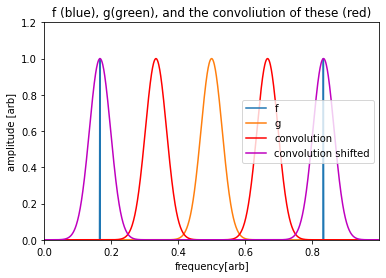

In [29]:
conv_prev = convolution(f,g)
# Roll the function g by the Nyquist frequency to shift it
conv = convolution(f,np.roll(g,int(N/2)))


pl.plot(t,f, label='f')
pl.plot(t,g, label='g')
pl.plot(t,conv_prev,"r", label='convolution')
pl.plot(t,conv,"m", label='convolution shifted')
plt.legend(loc='best')
pl.axis([np.min(t),np.max(t),0,1.2])

pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.title("f (blue), g(green), and the convoliution of these (red)")
pl.show()

Given the uniquity of the need to center convolutions this way numpy has an "fftshift" function built in to do this, rather than us using the roll function. The fftshift computes the Nyquist frequency if the lenght of the vector is even, and shifts by that amount, so that the zero-frequency component is at the center of the spectrum.

Speed is a big issue in convolutions.  Conveniently there is a way to massively accelerate this algorythem using the FFT with the convolution theorem:
$$(f * g) = iFFT(FFT(f) * FFT(g)). $$
In other words the convoluiton is the inverse fourier transform of the product of the fourier transforms of the two functions.

C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\matplotlib\transforms.py:2817: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


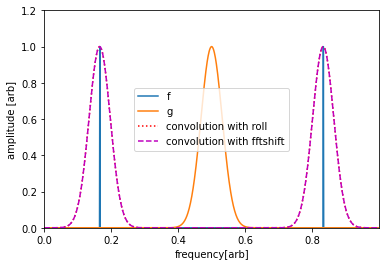

In [30]:
def fft_convolve(f,g):
    
    FFTf = fourier(f)
    FFTg = fourier(g)
    conv = inv_fourier(FFTf*FFTg)
    return conv

conv = fft_convolve(f,np.roll(g,int(N/2)))
npconv = fft_convolve(f,np.fft.fftshift(g))

pl.plot(t,f, label='f')
pl.plot(t,g, label='g')
pl.plot(t,conv,':r', label="convolution with roll")
pl.plot(t,npconv,'--m', label="convolution with fftshift")
plt.legend(loc='best')
pl.axis([np.min(t),np.max(t),0,1.2])

pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.show()

as expected the results are the same for this method as for the direct method

## Centering and FFTs

Centering of the input to the FFT is realted to the phase in the output.  In the following example (which is a cautionary tale) we see how offsetting the input can result in a strong phase modultion (eg rotation beteen real and imaginary) in the ouput.

C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.45, 0.55, -100.0, 100.0)

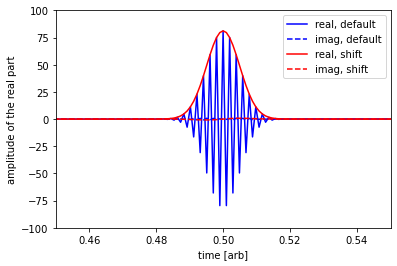

In [31]:
g = np.exp(-5 * ((t-np.mean(t))/.1)**2.)

## default centering
pl.plot(t,np.fft.fftshift(np.real(np.fft.fft(g))),"b", label='real, default')
pl.plot(t,np.fft.fftshift(np.imag(np.fft.fft(g))),"b--", label='imag, default')
## with a shift of the input
pl.plot(t,np.fft.fftshift(np.real(np.fft.fft(np.fft.fftshift(g)))),"r",label='real, shift')
pl.plot(t,np.fft.fftshift(np.imag(np.fft.fft(np.fft.fftshift(g)))),"r--", label='imag, shift')
## labels etc
pl.xlabel("time [arb]")
pl.ylabel("amplitude of the real part")
plt.legend(loc='best')
#pl.title("FFT results for default centering (blue) and shifted(red). Real part is continuous, imaginary part is dashed")
pl.axis([0.45,.55,-100,100])

It is clear that both centerings give the same info, but the phase has been rotated to make the result purely real by shifting the input before the FFT.  If you see oscillaitons in your FFT results, this is almost always what is happening.

# Two dimensional FFTs

FFT2 implements the fourier transform in two dimensions. We will use the fft2 functionality of Numpy extensively in this course so here we build a few examples.   First we will generate a 2D gaussian and visualize its 2d fft.

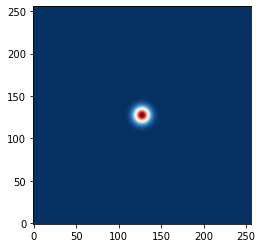

In [44]:
## first make a coordinate system
N = 256
x,y = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N)) ## make a 2d array of x and y coordinates
r = np.sqrt(x**2 + y**2)  ## calculate the radial coordinate of each pixel

## now make a 2d gaussian
gaussian_2d = np.exp(-.5 *(r/.05)**2)

## now plot the gaussian
pl.imshow(gaussian_2d, interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)

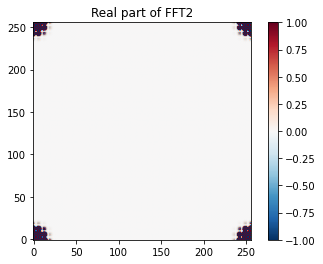

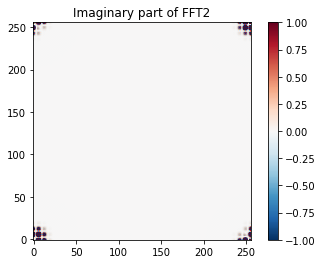

In [52]:
fft_ga_2d = np.fft.fft2(gaussian_2d)  ## calcualte the 2d FFT of our gaussian
im = pl.imshow(np.real(fft_ga_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-1,1)
plt.colorbar()
pl.title('Real part of FFT2')
pl.show()
im = pl.imshow(np.imag(fft_ga_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-1,1)
plt.colorbar()
pl.title('Imaginary part of FFT2')
pl.show()

From this example we see that

    (1) the FFT of a gaussian is a gaussian,
    (2) the FFT is a complex quantity,
    (2) the smaller the gaussian the bigger the FFT of it is (eg the uncertainty principle), and
    (3) the result is centered at zero frequency just as we would expect from the 1d example.
    
    
Depending on the application we must often carefully consider the centering of the input and output arrays.  Note above that the results oscillate on the pixel scale betwen positive and negative.  This is a results of the centering choices of the input array.  We must fix this with shfits just as we did in the 1D example.

Here we illustrate this with the following examples.  First we shift the input array using fftshift:

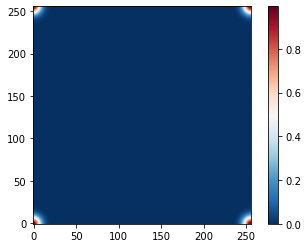

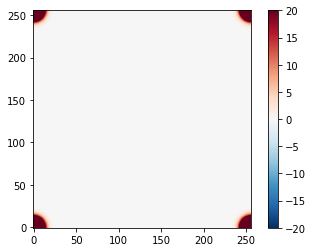

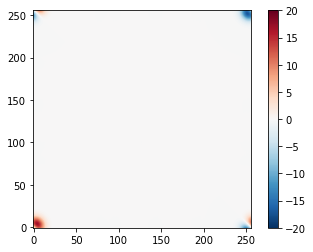

In [48]:
pl.imshow(np.fft.fftshift(gaussian_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
plt.colorbar()
pl.show()
fft_ga_2d = np.fft.fft2(np.fft.fftshift(gaussian_2d))  ## calcualte the 2d FFT of our gaussian
im = pl.imshow(np.real(fft_ga_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-20,20)
plt.colorbar()
pl.show()
im = pl.imshow(np.imag(fft_ga_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-20,20)
plt.colorbar()
pl.show()


Note the FFT shift of the input array did not change the centering of the output array, but it did get rid of the oscillations.  We next also shift the output:

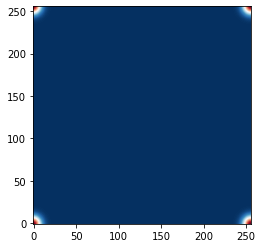

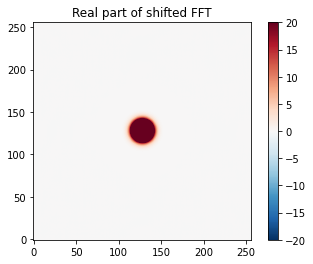

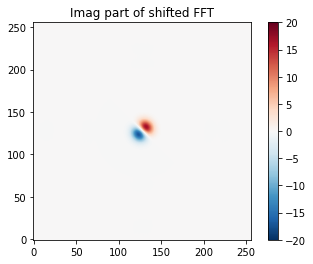

In [53]:
pl.imshow(np.fft.fftshift(gaussian_2d), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
pl.show()
fft_ga_2d = np.fft.fft2(np.fft.fftshift(gaussian_2d))  ## calcualte the 2d FFT of our gaussian
im = pl.imshow(np.fft.fftshift(np.real(fft_ga_2d)), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-20,20)
plt.colorbar()
plt.title('Real part of shifted FFT')
pl.show()
im = pl.imshow(np.fft.fftshift(np.imag(fft_ga_2d)), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-20,20)
plt.colorbar()
plt.title('Imag part of shifted FFT')
pl.show()



Depending on the appliation we will shift the input and output arrays to make sense of the results.

## 2D convolution

In the final example we present a 2d convolution, something that we use a lot in CMB analysis.

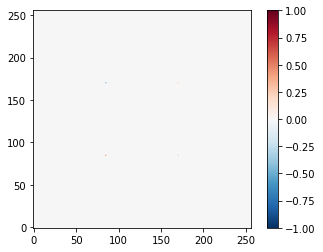

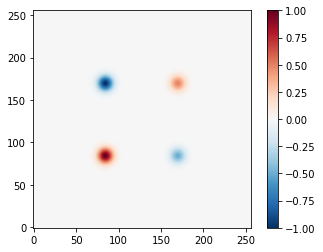

In [27]:
input = np.zeros([N,N])
input[int(N/3),int(N/3)] = 1
input[int(N*2/3),int(N*2/3)] = .5
input[int(N/3),int(N*2/3)] = -.5
input[int(N*2/3),int(N/3)] = -1

im = pl.imshow(input, interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-1.,1.)
plt.colorbar()
pl.show()

convolution = np.fft.ifft2(np.fft.fft2(np.fft.fftshift(gaussian_2d)) * np.fft.fft2(input))

im = pl.imshow(np.real(convolution), interpolation='bilinear', origin='lower',cmap=cmap.RdBu_r)
im.set_clim(-1.,1.)
plt.colorbar()
pl.show()

For this applicaiton centering the kernel on zero frequency centers the peaks of the convolution on the peaks of the input map.  We will use this approach to generate realizations of point sources.